# Test model

## imports and installs

In [1]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 45kB/s 
     |████████████████████████████████| 368kB 47.5MB/s 
     |████████████████████████████████| 3.2MB 34.6MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0


In [2]:
pip install imageai

     |████████████████████████████████| 184kB 3.3MB/s 


In [0]:
import imageai

In [4]:
from imageai.Detection.Custom import DetectionModelTrainer # will tell you to upgrade to tf2.x, ignore as this won't work in 2.x

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

## Evaluate on test

In [5]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper")
metrics = trainer.evaluateModel(model_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/models", 
                                json_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/json/detection_config.json", 
                                iou_threshold=0.5, 
                                object_threshold=0.3, 
                                nms_threshold=0.5)
print(metrics)

Starting Model evaluation....
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  /content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/models/detection_model-ex-001--loss-0068.417.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
toiletpaper: 0.0058
mAP: 0.0058
[{'model_file': '/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/models/detection_model-ex-001--loss-0068.417.h5', 'using_iou': 0.5, 'using_object_threshold': 0.3, 'using_non_maximum_suppression': 0.5, 'average_precision': {'toiletpaper': 0.005822935234699941}, 'map': 0.005822935234699941}]


## Test

In [0]:
from imageai.Detection.Custom import CustomObjectDetection


In [0]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/models/detection_model-ex-001--loss-0068.417.h5")
detector.setJsonPath("/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp95.jpg", 
                                             output_image_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp95tested.jpg",
                                             minimum_percentage_probability=28)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

In [31]:
detections = detector.detectObjectsFromImage(input_image="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp96.jpg", 
                                             output_image_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp96tested.jpg",
                                             minimum_percentage_probability=24)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

toiletpaper  :  24.345378577709198  :  [78, 0, 257, 203]
toiletpaper  :  24.32296574115753  :  [118, 103, 137, 114]
toiletpaper  :  26.07378363609314  :  [137, 122, 152, 135]


In [28]:
detections = detector.detectObjectsFromImage(input_image="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp99.jpg", 
                                             output_image_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp99tested.jpg",
                                             minimum_percentage_probability=28)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

toiletpaper  :  31.377407908439636  :  [0, 20, 200, 188]


In [37]:
detections = detector.detectObjectsFromImage(input_image="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp97.jpg", 
                                             output_image_path="/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/validation/images/tp97lotsbox.jpg",
                                             minimum_percentage_probability=15)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

toiletpaper  :  41.1933034658432  :  [42, 49, 177, 143]
toiletpaper  :  25.84138810634613  :  [88, 0, 164, 447]
toiletpaper  :  15.60448408126831  :  [124, 3, 158, 180]
toiletpaper  :  16.92686229944229  :  [70, 0, 151, 327]
toiletpaper  :  21.237820386886597  :  [0, 110, 224, 240]
toiletpaper  :  31.272321939468384  :  [47, 49, 148, 97]
toiletpaper  :  21.193191409111023  :  [57, 71, 119, 162]


# EDA

## RGB/BGR distribution

In [0]:
import cv2
import os
import glob
img_dir = "/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images" # train image directory 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [0]:
### NEED TO RUN SEPARATELY OR ELSE I'D RUN OUT OF SPACE:

In [0]:
B_list = []
G_list = []
R_list = []
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      B_list.append(i[j][k][0])
      # G_list.append(i[j][k][1])
      # R_list.append(i[j][k][2])

In [6]:
sum(B_list)/len(B_list)

85.14902527293562

In [0]:
import numpy as np
B_list = np.array(B_list) # save space because RAM usage is shooting up

In [0]:
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      # B_list.append(i[j][k][0])
      G_list.append(i[j][k][1])
      # R_list.append(i[j][k][2])

In [0]:
G_list = np.array(G_list)

In [0]:
for i in data:
  width, height, channels = i.shape # data[0] is one image: width, height, channels
  for j in range(width):
    for k in range(height):
      # B_list.append(i[j][k][0])
      # G_list.append(i[j][k][1])
      R_list.append(i[j][k][2])

In [0]:
R_list = np.array(R_list)

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Intensity Value')

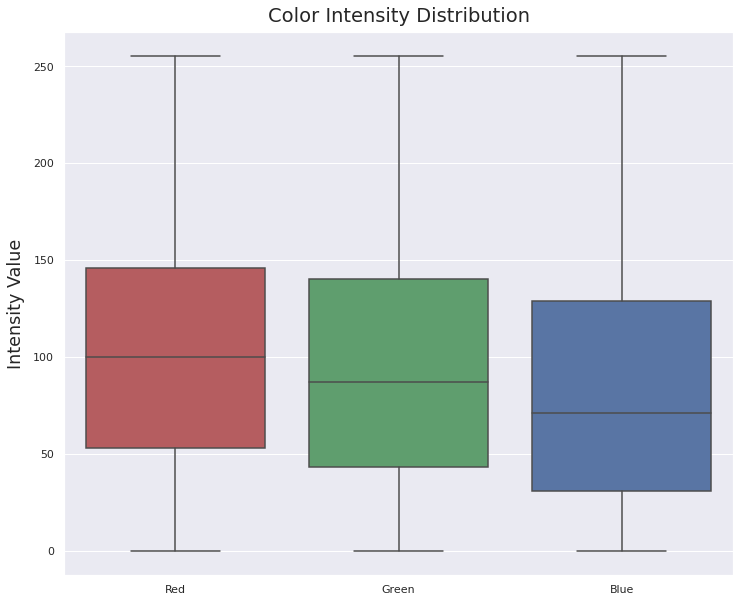

In [15]:
sns.set(rc = {'figure.figsize':(12,10)})

boxplot = sns.boxplot(x=['Red', 'Green', 'Blue'], y=[R_list, G_list, B_list], palette = ['r', 'g', 'b']) #showfliers = False)

# boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
boxplot.axes.set_title('Color Intensity Distribution', fontsize = 19.5, pad = 10) # title info
# boxplot.set_xlabel('Genres', fontsize = 18, labelpad = 10) # xlabel info
boxplot.set_ylabel('Intensity Value', fontsize = 17.5, labelpad = 8) # ylabel info




## Image size distribution (width, height)

In [0]:
import cv2
import os
import glob
img_dir = "/content/drive/My Drive/Object Detection Final Project/obj_detect_2/toiletpaper/train/images" # train image directory 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [0]:
wh_list = []
for i in data:
  wh_list.append((i.shape[0], i.shape[1])) # data[0] is one image: width, height, channels

In [5]:
wh_list[:4]

[(240, 300), (293, 220), (1500, 1500), (2700, 1800)]

In [0]:
import collections
size_count = collections.defaultdict(int)

In [0]:
for i in wh_list:
  size_count[i] += 1

In [26]:
size_count

defaultdict(int,
            {(163, 310): 2,
             (168, 300): 1,
             (174, 290): 1,
             (183, 275): 5,
             (183, 276): 1,
             (185, 272): 1,
             (194, 259): 3,
             (195, 259): 1,
             (201, 251): 1,
             (204, 233): 1,
             (210, 210): 1,
             (212, 238): 1,
             (225, 224): 1,
             (225, 225): 2,
             (229, 220): 1,
             (240, 300): 1,
             (249, 203): 1,
             (251, 201): 1,
             (275, 183): 1,
             (293, 220): 1,
             (299, 168): 1,
             (300, 215): 1,
             (337, 600): 1,
             (348, 348): 1,
             (367, 550): 1,
             (405, 540): 1,
             (422, 500): 1,
             (432, 764): 1,
             (440, 700): 1,
             (450, 338): 1,
             (512, 1024): 1,
             (523, 523): 1,
             (600, 900): 1,
             (620, 1024): 1,
             (682, 1023): 1,


In [27]:
size_count = dict(size_count)
size_count

{(163, 310): 2,
 (168, 300): 1,
 (174, 290): 1,
 (183, 275): 5,
 (183, 276): 1,
 (185, 272): 1,
 (194, 259): 3,
 (195, 259): 1,
 (201, 251): 1,
 (204, 233): 1,
 (210, 210): 1,
 (212, 238): 1,
 (225, 224): 1,
 (225, 225): 2,
 (229, 220): 1,
 (240, 300): 1,
 (249, 203): 1,
 (251, 201): 1,
 (275, 183): 1,
 (293, 220): 1,
 (299, 168): 1,
 (300, 215): 1,
 (337, 600): 1,
 (348, 348): 1,
 (367, 550): 1,
 (405, 540): 1,
 (422, 500): 1,
 (432, 764): 1,
 (440, 700): 1,
 (450, 338): 1,
 (512, 1024): 1,
 (523, 523): 1,
 (600, 900): 1,
 (620, 1024): 1,
 (682, 1023): 1,
 (720, 1080): 1,
 (720, 1280): 1,
 (825, 1100): 1,
 (953, 1300): 1,
 (960, 1280): 1,
 (1072, 1600): 1,
 (1200, 900): 2,
 (1200, 1200): 1,
 (1428, 2560): 1,
 (1500, 1000): 1,
 (1500, 1500): 1,
 (1500, 2000): 1,
 (1800, 1800): 1,
 (2322, 4128): 1,
 (2340, 4160): 1,
 (2472, 3296): 1,
 (2700, 1800): 1,
 (3000, 4000): 1,
 (3264, 2448): 1,
 (4032, 1960): 15,
 (4032, 3024): 1,
 (4048, 3036): 1}

In [16]:
counts_list = list(size_count.items())
counts_list

[((240, 300), 1),
 ((293, 220), 1),
 ((1500, 1500), 1),
 ((2700, 1800), 1),
 ((1500, 1000), 1),
 ((201, 251), 1),
 ((600, 900), 1),
 ((953, 1300), 1),
 ((422, 500), 1),
 ((168, 300), 1),
 ((1072, 1600), 1),
 ((210, 210), 1),
 ((3000, 4000), 1),
 ((1200, 900), 2),
 ((720, 1280), 1),
 ((1200, 1200), 1),
 ((682, 1023), 1),
 ((4032, 3024), 1),
 ((251, 201), 1),
 ((450, 338), 1),
 ((960, 1280), 1),
 ((300, 215), 1),
 ((1800, 1800), 1),
 ((432, 764), 1),
 ((337, 600), 1),
 ((275, 183), 1),
 ((195, 259), 1),
 ((512, 1024), 1),
 ((2322, 4128), 1),
 ((299, 168), 1),
 ((225, 225), 2),
 ((183, 275), 5),
 ((2472, 3296), 1),
 ((720, 1080), 1),
 ((620, 1024), 1),
 ((229, 220), 1),
 ((194, 259), 3),
 ((1428, 2560), 1),
 ((163, 310), 2),
 ((212, 238), 1),
 ((183, 276), 1),
 ((523, 523), 1),
 ((185, 272), 1),
 ((174, 290), 1),
 ((405, 540), 1),
 ((3264, 2448), 1),
 ((225, 224), 1),
 ((249, 203), 1),
 ((440, 700), 1),
 ((825, 1100), 1),
 ((348, 348), 1),
 ((367, 550), 1),
 ((1500, 2000), 1),
 ((204, 233

In [0]:
widths = [i[0][0] for i in counts_list]
heights = [i[0][1] for i in counts_list]
counts = [i[1] for i in counts_list]

In [29]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Height')

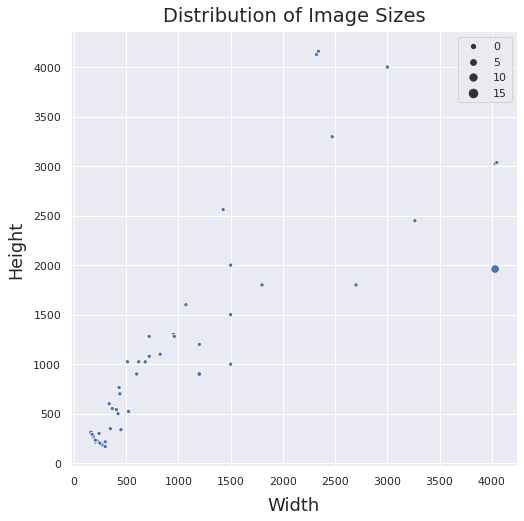

In [34]:
sns.set(rc = {'figure.figsize':(8,8)})

scatter_wh = sns.scatterplot(x = widths, y = heights, size = counts, palette = 'b', )

# scatter_wh.set_xticklabels(boxplot.get_xticklabels(), rotation = 90) # x-tick label info
scatter_wh.axes.set_title('Distribution of Image Sizes', fontsize = 19.5, pad = 10) # title info
scatter_wh.set_xlabel('Width', fontsize = 18, labelpad = 10) # xlabel info
scatter_wh.set_ylabel('Height', fontsize = 17.5, labelpad = 8) # ylabel info